<a href="https://colab.research.google.com/github/Gabrielvss/Fetal-Health-Classification/blob/main/3_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning
Construção de uma rede neural para classificação

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df = pd.read_csv("fetal_health.csv")

## Pré-processamento
O pré processamento dos dados será o mesmo discutido no notebook anterior

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
#Conjunto de treino 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

Escalonamento

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

Balanceamento

In [ ]:
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler()
X_train_res, y_train_res = os.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


As variavies de saída serão convertidas para o tipo dummy, ou seja, cata categoria vai se transformar em um arry de zeros e uns que caracteriza tal classe, por exemplo:

* 1 = [1,0,0]
* 2 = [0,1,0]
* 3 = [0,0,1]

Esse processo é nescessário para terinar o classicador, porém não para o croos validation.

In [ ]:
y_train_res_dummy=np.asarray(pd.get_dummies(y_train_res,dtype=float))
y_test_dummy=np.asarray(pd.get_dummies(y_test,dtype=float))

## Construindo a rede neural 
A rede neural será do tipo densa, será contruída utilizando a versão simplificada do framework Tensorflow o Keras, a arquitetura da rede será:

* Camada de entrada com 21 neurônios, um para cada entrada.
* Duas camadas intermediárias com 16 neurônios. 
* Camada de saída com três neurônios, um para cada categoria. 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
#Função com a arquitetura da rede
def make_network():  
  classifier = Sequential()
  classifier.add(Dense(units=16, activation="relu", input_dim=21 ))
  classifier.add(Dense(units=16, activation="relu"))
  classifier.add(Dense(units = 3, activation='softmax'))
  classifier.compile(optimizer="adam", loss = "categorical_crossentropy",
                    metrics = ["categorical_accuracy"])
  return classifier

O número de epocas será de 200 o que siginifica que os dados serão apresentados 150 vezes ao modelo para atualizar os pesos da rede neural.

In [ ]:
#Criando o classificador
classifier = KerasClassifier(build_fn=make_network,
                             batch_size=10,
                             epochs=200)

Para obter a acurácia da rede será utilizado o Cross Validation, como nos modelos anteriores.

In [ ]:
results = cross_val_score(estimator = classifier,
                          X = X_train_res, y = y_train_res,
                          cv=10, scoring='accuracy')

Epoch 1/200
357/357 [==============================] - 1s 891us/step - loss: 0.9829 - categorical_accuracy: 0.4985
Epoch 2/200
357/357 [==============================] - 0s 852us/step - loss: 0.5090 - categorical_accuracy: 0.8093
Epoch 3/200
357/357 [==============================] - 0s 864us/step - loss: 0.4067 - categorical_accuracy: 0.8560
Epoch 4/200
357/357 [==============================] - 0s 900us/step - loss: 0.3499 - categorical_accuracy: 0.8609
Epoch 5/200
357/357 [==============================] - 0s 831us/step - loss: 0.3352 - categorical_accuracy: 0.8697
Epoch 6/200
357/357 [==============================] - 0s 882us/step - loss: 0.3175 - categorical_accuracy: 0.8776
Epoch 7/200
357/357 [==============================] - 0s 885us/step - loss: 0.2942 - categorical_accuracy: 0.8880
Epoch 8/200
357/357 [==============================] - 0s 873us/step - loss: 0.2887 - categorical_accuracy: 0.8824
Epoch 9/200
357/357 [==============================] - 0s 869us/step - loss: 0.3

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


357/357 [==============================] - 1s 836us/step - loss: 0.9663 - categorical_accuracy: 0.5679
Epoch 2/200
357/357 [==============================] - 0s 833us/step - loss: 0.4870 - categorical_accuracy: 0.8292
Epoch 3/200
357/357 [==============================] - 0s 911us/step - loss: 0.3892 - categorical_accuracy: 0.8509
Epoch 4/200
357/357 [==============================] - 0s 879us/step - loss: 0.3817 - categorical_accuracy: 0.8476
Epoch 5/200
357/357 [==============================] - 0s 874us/step - loss: 0.3576 - categorical_accuracy: 0.8545
Epoch 6/200
357/357 [==============================] - 0s 901us/step - loss: 0.3367 - categorical_accuracy: 0.8753
Epoch 7/200
357/357 [==============================] - 0s 883us/step - loss: 0.3431 - categorical_accuracy: 0.8697
Epoch 8/200
357/357 [==============================] - 0s 875us/step - loss: 0.3412 - categorical_accuracy: 0.8694
Epoch 9/200
357/357 [==============================] - 0s 898us/step - loss: 0.3072 - catego

In [ ]:
mean = results.mean()
std = results.std()
print(f'acurácia: {mean} std: {std}')

acurácia: 0.9405039055542834 std: 0.017189156664194027


A acurácia deste modelo se mostrou superior ao dos anteriores, como esperado, agora vamos analisar o desempenho do modelo nos dados de teste.

## Treinando um classificador e calculando a Matriz de confusão

In [ ]:
clf = Sequential()
clf.add(Dense(units=16, activation="relu", input_dim=21 ))
clf.add(Dense(units=16, activation="relu"))
clf.add(Dense(units = 3, activation='softmax'))
clf.compile(optimizer="adam", loss = "categorical_crossentropy",
                  metrics = ["categorical_accuracy"])
clf.fit(X_train_res,y_train_res_dummy,
                             batch_size=10,
                             epochs=200)

Epoch 1/200
397/397 [==============================] - 1s 843us/step - loss: 0.9792 - categorical_accuracy: 0.5476
Epoch 2/200
397/397 [==============================] - 0s 850us/step - loss: 0.4748 - categorical_accuracy: 0.8347
Epoch 3/200
397/397 [==============================] - 0s 845us/step - loss: 0.4055 - categorical_accuracy: 0.8462
Epoch 4/200
397/397 [==============================] - 0s 857us/step - loss: 0.3581 - categorical_accuracy: 0.8640
Epoch 5/200
397/397 [==============================] - 0s 857us/step - loss: 0.3593 - categorical_accuracy: 0.8627
Epoch 6/200
397/397 [==============================] - 0s 859us/step - loss: 0.3440 - categorical_accuracy: 0.8693
Epoch 7/200
397/397 [==============================] - 0s 848us/step - loss: 0.3306 - categorical_accuracy: 0.8762
Epoch 8/200
397/397 [==============================] - 0s 876us/step - loss: 0.3236 - categorical_accuracy: 0.8787
Epoch 9/200
397/397 [==============================] - 0s 864us/step - loss: 0.3

In [ ]:
#retornando as variáveis para seus formato original
y_pred = [np.argmax(i) for i in clf.predict(X_test)>0.5]

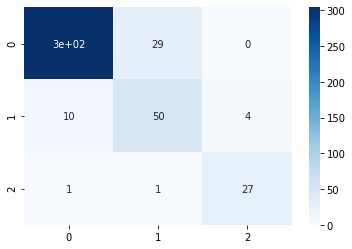

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred)[1:4,0:3],annot=True,cmap='Blues')

